In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import math
import random
from datetime import datetime
from collections import Counter
#import matplotlib.pyplot as plt
#import seaborn as sns
import os
import pickle as pkl

In [2]:
os.chdir('/shared/3/projects/style-influence/')

In [3]:
per_post_users = pkl.load(open('data/dl-inferred-style-scores/all_scores.formality.pkl', 'rb'))
len(per_post_users)
#per_post_users.shape

9

In [4]:
per_post_users.keys()

dict_keys(['row_id', 'subreddit', 'author', 'root_id', 'column_id', 'parent_id', 'depth', 'created_utc', 'score'])

In [5]:
per_post_users['column_id'][1:10]

['fb3e7jm',
 'fb3dzam',
 'fb3dx1f',
 'fb3di1r',
 'fb3ddy2',
 'fb3dbum',
 'fb3d9cg',
 'fb3d6hd',
 'fb3d3ss']

In [6]:
per_post_users['parent_id'][1:10]

['fb3dzam',
 'fb3dx1f',
 'fb3di1r',
 'fb3ddy2',
 'fb3dbum',
 'fb3d9cg',
 'fb3d6hd',
 'fb3d3ss',
 'fb3cyww']

In [7]:
ids = set(per_post_users['column_id'])
len(ids)

19157681

In [20]:
ids_parent = [x for x in per_post_users['parent_id'] if type(x)!=float and x!='']
ids_parent = set(ids_parent)
len(ids_parent)

16893358

In [21]:
len(ids_parent - ids)

41452

In [86]:
basedir = '/shared/3/projects/style-influence/data/conversation-turns-tokenized-aba/'
mon = 'RC_2019-06'

df = pd.read_csv(basedir + mon + '.user_subreddit.csv')
df_user = df.groupby('author')['comment_id'].sum().reset_index()
ids=set(df_user.author[df_user.comment_id > 20])
len(ids)

60248

In [87]:
len(set(df_user.author))

1607399

In [ ]:
per_post_users = []
for file in os.listdir(basedir):
    if file.startswith(mon) and file.endswith('.pkl'):
        print(file)
        df = pkl.load(open(basedir + file, 'rb'))
        per_post_users.append(df[df.author.isin(ids)])
    #break

per_post_users = pd.concat(per_post_users)


In [14]:
per_post_users['len_a'] = per_post_users['tokens_liwc_parent'].apply(lambda x: x['length'] 
                                                                     if type(x)!=float else 0)
per_post_users['len_b'] = per_post_users['tokens_liwc'].apply(lambda x: x['length'])

print(per_post_users.shape)
per_post_users = per_post_users[(per_post_users['parent_id']!='') &
                                (per_post_users['len_a']>0) & 
                                (per_post_users['len_b']>0)]
print(per_post_users.shape)


(739591, 28)
(739591, 28)


In [ ]:
# mini's
# lan city
# zingerman's
# buddy's / jolly pumpkin
# middle eastern
# dfs / lunch room
# 24th cheesecakerie
# cinnaholic


In [64]:
def add_n(counterliwc):
    counterliwc['n']=1
    return counterliwc

def replaceDict(counterliwc):
    replacedDict = {x: 1 for x in counterliwc}
    return Counter(replacedDict)
    
per_post_users['len_a'] = per_post_users['tokens_liwc_parent'].apply(lambda x: x['length'] 
                                                                     if type(x)!=float else 0)
per_post_users['len_b'] = per_post_users['tokens_liwc'].apply(lambda x: x['length'])

per_post_users['tokens_liwc']=per_post_users['tokens_liwc'].apply(add_n)
per_post_users['tokens_liwc_replaced']=per_post_users['tokens_liwc'].apply(replaceDict)
per_post_users['tokens_dict']=per_post_users['tokens'].apply(Counter)
per_post_users['tokens_parent_dict']=per_post_users['tokens_parent'].apply(Counter)

user_all_posts_sum = per_post_users.groupby('author')[['tokens_liwc','tokens_liwc_replaced',
                                                       'tokens_dict','tokens_parent_dict']].sum().reset_index()
user_all_posts_sum.columns = ['author','tokens_liwc_all_sum','tokens_liwc_all_count',
                              'tokens_all_sum','tokens_parent_all_sum']
per_post_users = pd.merge(per_post_users, user_all_posts_sum, on='author')
per_post_users.head()

,level_0,index,body,author,comment_id,created_utc,controversiality,score,author_flair_css_class,author_flair_text,...,tokens_liwc_parent,len_a,len_b,tokens_liwc_replaced,tokens_dict,tokens_parent_dict,tokens_liwc_all_sum,tokens_liwc_all_count,tokens_all_sum,tokens_parent_all_sum
0,3434187,676617,I feel sad. PVB was so entertaining to watch a...,Azenji,eynm4ib,1567252499,0,4,,,...,"{'function (Function Words)': 6, 'adverb (Adve...",14,22,"{'function (Function Words)': 1, 'pronoun (Pro...","{'i': 1, 'feel': 1, 'sad': 1, 'pvb': 1, 'was':...","{'how': 1, 'dbl': 1, 'has': 1, 'fallen': 1, 's...","{'function (Function Words)': 11, 'pronoun (Pr...","{'function (Function Words)': 1, 'pronoun (Pro...","{'i': 1, 'feel': 1, 'sad': 1, 'pvb': 1, 'was':...","{'how': 1, 'dbl': 1, 'has': 1, 'fallen': 1, 's..."
1,2850434,317574,"It's art, you know?",k_l_o_p_p_s,eyi2kpa,1567096634,0,59,,,...,"{'function (Function Words)': 6, 'adverb (Adve...",10,5,"{'function (Function Words)': 1, 'pronoun (Pro...","{'it': 1, 's': 1, 'art': 1, 'you': 1, 'know': 1}","{'why': 1, 'the': 1, 'fuck': 1, 'is': 1, 'arab...","{'function (Function Words)': 2, 'pronoun (Pro...","{'function (Function Words)': 1, 'pronoun (Pro...","{'it': 1, 's': 1, 'art': 1, 'you': 1, 'know': 1}","{'why': 1, 'the': 1, 'fuck': 1, 'is': 1, 'arab..."
2,3427882,655430,Talk to siswet. She’ll say no.,HRC_itsherturn,ey9pbo2,1566949041,0,3,,,...,"{'verb (Verbs)': 1, 'cogproc (Cognitive Proces...",10,7,"{'social (Social)': 1, 'focuspresent (Present ...","{'talk': 1, 'to': 1, 'siswet': 1, 'she': 1, 'l...","{'wonder': 1, 'if': 1, 'when': 1, 'the': 1, 'h...","{'social (Social)': 3, 'focuspresent (Present ...","{'social (Social)': 1, 'focuspresent (Present ...","{'talk': 1, 'to': 1, 'siswet': 1, 'she': 1, 'l...","{'wonder': 1, 'if': 1, 'when': 1, 'the': 1, 'h..."
3,5725625,738173,mmm thanks again ;),throwwawayy1311,f2yarqo,1570488325,0,1,,,...,"{'function (Function Words)': 3, 'pronoun (Pro...",5,3,"{'informal (Informal Language)': 1, 'nonflu (N...","{'mmm': 1, 'thanks': 1, 'again': 1}","{'i': 1, 'love': 1, 'the': 1, 'pubes': 1, 'too...","{'informal (Informal Language)': 1, 'nonflu (N...","{'informal (Informal Language)': 1, 'nonflu (N...","{'mmm': 1, 'thanks': 1, 'again': 1}","{'i': 1, 'love': 1, 'the': 1, 'pubes': 1, 'too..."
4,7138143,30652,Thank you very much for your kind words. :),ADALASKA-official,f7evc8r,1573666615,0,2,,Lyrical Tenor,...,"{'function (Function Words)': 25, 'pronoun (Pr...",44,8,"{'verb (Verbs)': 1, 'affect (Affect)': 1, 'pos...","{'thank': 1, 'you': 1, 'very': 1, 'much': 1, '...","{'this': 3, 'is': 1, 'golden': 1, 'i': 2, 've'...","{'verb (Verbs)': 1, 'affect (Affect)': 2, 'pos...","{'verb (Verbs)': 1, 'affect (Affect)': 1, 'pos...","{'thank': 1, 'you': 1, 'very': 1, 'much': 1, '...","{'this': 3, 'is': 1, 'golden': 1, 'i': 2, 've'..."


In [65]:
import liwc
lexicon, category_names = liwc.read_dic('/shared/3/projects/agrimaTwitter/LIWC2015_English.dic')
words_per_category = {c:set([k for k,v in lexicon.items() if c in v]) for c in category_names}


In [92]:
category = 'function (Function Words)'
words = words_per_category[category]
per_post_users['category_words_parent'] = per_post_users['tokens_parent_dict'].\
apply(lambda x: set([k for k in x if k in words]))
per_post_users['category_words'] = per_post_users.apply(lambda row: row['category_words_parent'].\
                                                        intersection(set(row['tokens_dict'].keys())), axis=1)
per_post_users['num_category_words'] = per_post_users['category_words'].apply(len)
per_post_users['num_category_words_parent'] = per_post_users['category_words_parent'].apply(len)


In [96]:
per_post_users['num_category_words'] / per_post_users['len_a'] / per_post_users['num_category_words_parent']

0          0.011905
1          0.000000
2          0.000000
3          0.000000
4          0.003589
             ...   
1499995    0.001512
1499996    0.002387
1499997    0.016667
1499998    0.055556
1499999    0.000329
Length: 1500000, dtype: float64

In [232]:
sub = per_post_users[per_post_users['tokens_liwc_all_sum'].apply(lambda x: x['n']) >= 10].reset_index(drop=True)
sub = sub[~sub['tokens_liwc_all_sum'].isna()]
sub['num_category_words_all'] = 0
sub['len_a_all'] = 0
sub['len_b_all'] = sub['tokens_liwc_all_sum'].apply(lambda x: x['length'])
sub.shape

(43073, 42)

In [233]:
pd.options.mode.chained_assignment = None 
print(datetime.now())
for aid in set(sub.author):
    sub1 = sub[sub.author==aid]
    for i in sub1.index:
        words = sub1.category_words_parent[i]
        sub['num_category_words_all'][i] = sub1.apply(lambda row: 
                                                      len(words.intersection(set(row['tokens_dict'].keys()))), 
                                                      axis=1).sum()
        sub['len_a_all'][i] = min(1, sub1.apply(lambda row: 
                                         len(words.intersection(set(row['tokens_parent_dict'].keys()))), 
                                         axis=1).sum())
print(datetime.now())
pd.options.mode.chained_assignment = 'warn'


2023-04-17 01:01:06.090195
2023-04-17 01:04:51.475888


In [259]:
sub['len_a_all'] = sub['len_a_all'].apply(lambda x: 1 if x==0 else x)

In [260]:
def log_odds(p):
    if p==0.: p = p + 0.00000000001
    elif p==1.: p = p - 0.00000000001
    return np.log(p / (1-p))

In [274]:
sub['metric3'] = (sub['num_category_words'] / sub['len_b'] / sub['len_a']).apply(log_odds) -\
(sub['num_category_words_all'] / sub['len_b_all'] / sub['len_a_all']).apply(log_odds)


In [275]:
import scipy
scipy.stats.describe(sub['metric3'])

DescribeResult(nobs=43073, minmax=(-23.862098954131078, 31.099877063314153), mean=-4.509155693833226, variance=77.64282136164863, skewness=-1.030400980678519, kurtosis=-0.8228857707335999)

In [276]:
Counter(np.abs(sub['metric3'])<0.001)

Counter({False: 34318, True: 8755})

In [277]:
Counter(sub['metric3'] > 0.001)

Counter({True: 19475, False: 23598})

In [278]:
Counter(sub['metric3'] < -0.001)

Counter({False: 28230, True: 14843})

<Axes: xlabel='metric3', ylabel='Count'>

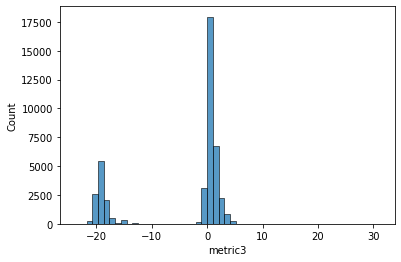

In [279]:
sns.histplot(sub['metric3'][sub['controversiality']==0])

In [284]:
import scipy
import statsmodels.formula.api as smf
import liwc
lexicon, category_names = liwc.read_dic('/shared/3/projects/agrimaTwitter/LIWC2015_English.dic')
words_per_category = {c:[k for k,v in lexicon.items() if c in v] for c in category_names}
pkl.dump(category_names, open('data/random/liwc_categories.pkl','wb'))

def fix_outlier(x):
    lower_bound = np.percentile(x,0.25) - 3*scipy.stats.iqr(x)
    upper_bound = np.percentile(x,0.75) + 3*scipy.stats.iqr(x)
    x[x>upper_bound] = upper_bound
    x[x<lower_bound] = lower_bound
    return x

def standardize(x):
    return (x - np.mean(x)) / np.std(x)


In [287]:
pd.options.mode.chained_assignment = None 

sub['len_a'] = standardize(sub['len_a'])
sub['len_a'] = fix_outlier(sub['len_a'])

sub['len_b'] = standardize(sub['len_b'])
sub['len_b'] = fix_outlier(sub['len_b'])

sub['parent_score'][sub['parent_score'].isna()] = 0
sub['parent_score'][sub['parent_score']==''] = 0
sub['parent_score'] = sub['parent_score'].astype(int)
sub['parent_score'] = standardize(sub['parent_score'])
sub['parent_score'] = fix_outlier(sub['parent_score'])

sub['score'] = standardize(sub['score'])
sub['score'] = fix_outlier(sub['score'])

sub['depth'] = standardize(sub['depth'])
sub['depth'] = fix_outlier(sub['depth'])

sub['max_depth'] = standardize(sub['max_depth'])
sub['max_depth'] = fix_outlier(sub['max_depth'])

pd.options.mode.chained_assignment = 'warn'

In [301]:
pd.options.mode.chained_assignment = None
sub['wait_time'] = sub.created_utc - sub.parent_created_utc
sub['wait_time'] = sub['wait_time']/60/60
sub['wait_time'] = sub['wait_time'].astype(float)
sub['wait_time'] = standardize(sub['wait_time'])
sub['wait_time'] = fix_outlier(sub['wait_time'])
sub['num_category_words_parent'] = standardize(sub['num_category_words_parent'])
sub['num_category_words_parent'] = fix_outlier(sub['num_category_words_parent'])
pd.options.mode.chained_assignment = 'warn'

In [297]:
sub['wait_time'].dtype

dtype('float64')

In [298]:
pd.options.mode.chained_assignment = None
sub['metric3'] = standardize(sub['metric3'])
sub['metric3'] = fix_outlier(sub['metric3'])
pd.options.mode.chained_assignment = 'warn'

<Axes: xlabel='metric3', ylabel='Count'>

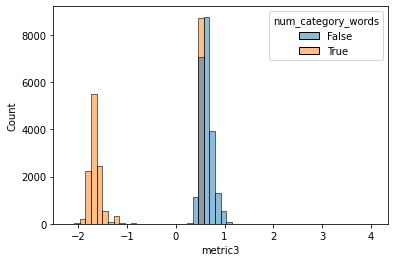

In [315]:
sns.histplot(x=sub['metric3'], hue=(sub['num_category_words']==0))

In [323]:
mod = smf.ols('metric3 ~ wait_time + len_a + len_b + parent_score + score + depth + max_depth +\
                 C(num_category_words==0) + num_category_words_parent', 
              data=sub[sub.num_category_words_parent>0]).fit()
mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                metric3   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     7913.
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:46:36   Log-Likelihood:                -4726.9
No. Observations:               15576   AIC:                             9474.
Df Residuals:                   15566   BIC:                             9550.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.6832      0.024     28.402      0.000       0.636       0.730
C(num_category_words == 0)[T.True]    -1.9481      0.008   -246.604      0.000      -1.964      -1.933
wait_time                             -0.1126      0.086     -1.307      0.191      -0.281       0.056
len_a                                  0.6252      0.020     31.808      0.000       0.587       0.664
len_b                                 -0.0537      0.005    -10.585      0.000      -0.064      -0.044
parent_score                           0.1745      0.141      1.242      0.214      -0.101       0.450
score                                  0.0675      0.061      1.106      0.269      -0.052       0.187
depth                                 -0.0695      0.035     -1.959      0.050      -0.139    3.69e-05
max_depth                             -0.0197      0.036     -0.543      0.587      -0.091       0.051
num_category_words_parent             -0.2614      0.008    -31.255      0.000      -0.278      -0.245
==============================================================================
Omnibus:                    11329.198   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189140.962
Skew:                           3.411   Prob(JB):                         0.00
Kurtosis:                      18.649   Cond. No.                         80.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

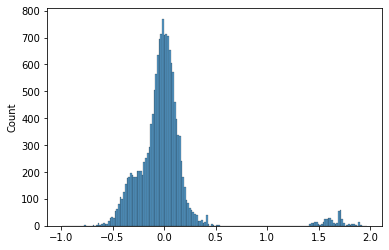

In [324]:
sns.histplot(mod.resid)

In [16]:

def getMetric1(x):
    
    tokens_liwc = x.tokens_liwc
    tokens_liwc_parent = x.tokens_liwc_parent
    tokens = x.tokens
    tokens_parent = x.tokens_parent
    tokens_liwc_all_sum = x.tokens_liwc_all_sum
    tokens_liwc_all_count = x.tokens_liwc_all_count
    
    #n = tokens_liwc_all_sum['n']
    #tokens_liwc_all.pop('n')
    temp_dict = dict(tokens_liwc_parent)
    keys_liwc_parent = list(temp_dict.keys())
    temp_list1 = [tokens_liwc_all_count[each_el] for each_el in keys_liwc_parent ]
    part2 = sum(temp_list1)
    
    norm2 = len(tokens_parent) * tokens_liwc_all_sum ['length']
    part2 = part2/norm2
    
    commonCategories = list(tokens_liwc.keys() & tokens_liwc_parent.keys())
    part1 = len(commonCategories)
    norm1 = len(tokens)*len(tokens_parent)
    part1 = part1/norm1
    
    
    ans = part1-part2
    
    return (ans)

In [17]:

def getMetric1(x):
    
    tokens_liwc = x.tokens_liwc
    tokens_liwc_parent = x.tokens_liwc_parent
    tokens = x.tokens
    tokens_parent = x.tokens_parent
    tokens_liwc_all_sum = x.tokens_liwc_all_sum
    tokens_liwc_all_count = x.tokens_liwc_all_count
    
    #n = tokens_liwc_all_sum['n']
    #tokens_liwc_all.pop('n')
    temp_dict = dict(tokens_liwc_parent)
    keys_liwc_parent = list(temp_dict.keys())
    temp_list1 = [tokens_liwc_all_count[each_el] for each_el in keys_liwc_parent ]
    part2 = sum(temp_list1)
    
    norm2 = len(tokens_parent) * tokens_liwc_all_sum ['length']
    part2 = part2/norm2
    
    commonCategories = list(tokens_liwc.keys() & tokens_liwc_parent.keys())
    part1 = len(commonCategories)
    norm1 = len(tokens)*len(tokens_parent)
    part1 = part1/norm1
    
    
    ans = part1-part2
    
    return (ans)

In [18]:

def getMetric2(x, cat):
    
    tokens_liwc = x.tokens_liwc
    tokens_liwc_parent = x.tokens_liwc_parent
    tokens_liwc_all_sum = x.tokens_liwc_all_sum
    tokens_liwc_all_count = x.tokens_liwc_all_count
    
    if tokens_liwc_parent[cat] == 0: return 0
    
    norm = tokens_liwc_parent[cat] / tokens_liwc_parent['length']
    part1 = tokens_liwc[cat] / tokens_liwc['length'] / norm
    part2 = tokens_liwc_all_sum[cat] / tokens_liwc_all_sum['length'] / norm / tokens_liwc_all_count['n']
    
    return part1-part2


In [19]:
per_post_users['metric1'] = per_post_users.apply(lambda x: getMetric1(x), axis=1)

In [20]:
per_post_users['metric2'] = per_post_users.apply(lambda x: 
                                                 getMetric2(x, cat='function (Function Words)'), axis=1)

<Axes: xlabel='metric3', ylabel='Proportion'>

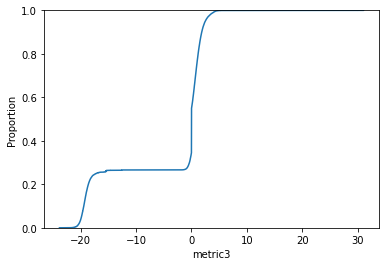

In [283]:
import seaborn as sns
sns.ecdfplot(sub['metric3'])

In [281]:
sub.\
groupby(['parent_controversiality','controversiality'])\
['metric3'].\
agg({'mean','var','count'})


var  count      mean
parent_controversiality controversiality                            
0                       0                 77.844339  42330 -4.533279
                        1                 63.730267    288 -3.040254
1                       0                 62.061674    387 -2.970935
                        1                 79.856053     68 -4.468210

In [2]:
banned

NameError: name 'banned' is not defined